In [80]:
import pandas as pd

import numpy as np

import scipy

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

In [81]:
# Input File paths

file = '../Data/combined_df_states.xlsx'

States_df = pd.read_excel(file)

States_df = States_df.fillna(0)

States_df.head()

,state,date,cases,deaths,Per_decrease_ret_rec,Per_decrease_parks,Per_decrease_grocery,Per_decrease_transit,Per_decrease_workplace,Per_decrease_residential
0,AK,2020-02-16,0.0,0.0,4,10,-2,-5,-32,8
1,AK,2020-02-17,0.0,0.0,-2,2,-2,3,-4,3
2,AK,2020-02-18,0.0,0.0,-1,1,-2,4,-3,2
3,AK,2020-02-19,0.0,0.0,3,5,2,1,1,0
4,AK,2020-02-20,0.0,0.0,0,1,-1,5,5,0


In [82]:
# Select 3 best and worst performing states

# https://research.stlouisfed.org/publications/economic-synopses/2020/04/03/u-s-states-hit-the-hardest-by-covid-19-have-lower-unemployment-risks

States_df_narrow = States_df.loc[States_df['state'].isin(['NY','NJ','LA','WV','NV','MN'])]

# Apply Datetime format to date field

States_df_narrow['date'] = pd.to_datetime(States_df_narrow['date'])

States_df_narrow.head()

<ipython-input-82-eb6b2ee514cd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  States_df_narrow['date'] = pd.to_datetime(States_df_narrow['date'])


,state,date,cases,deaths,Per_decrease_ret_rec,Per_decrease_parks,Per_decrease_grocery,Per_decrease_transit,Per_decrease_workplace,Per_decrease_residential
850,LA,2020-02-16,0.0,0.0,2,14,0,4,-3,2
851,LA,2020-02-17,0.0,0.0,3,13,2,3,1,0
852,LA,2020-02-18,0.0,0.0,4,16,0,11,1,0
853,LA,2020-02-19,0.0,0.0,1,-20,-1,2,-1,2
854,LA,2020-02-20,0.0,0.0,7,8,5,14,-1,1


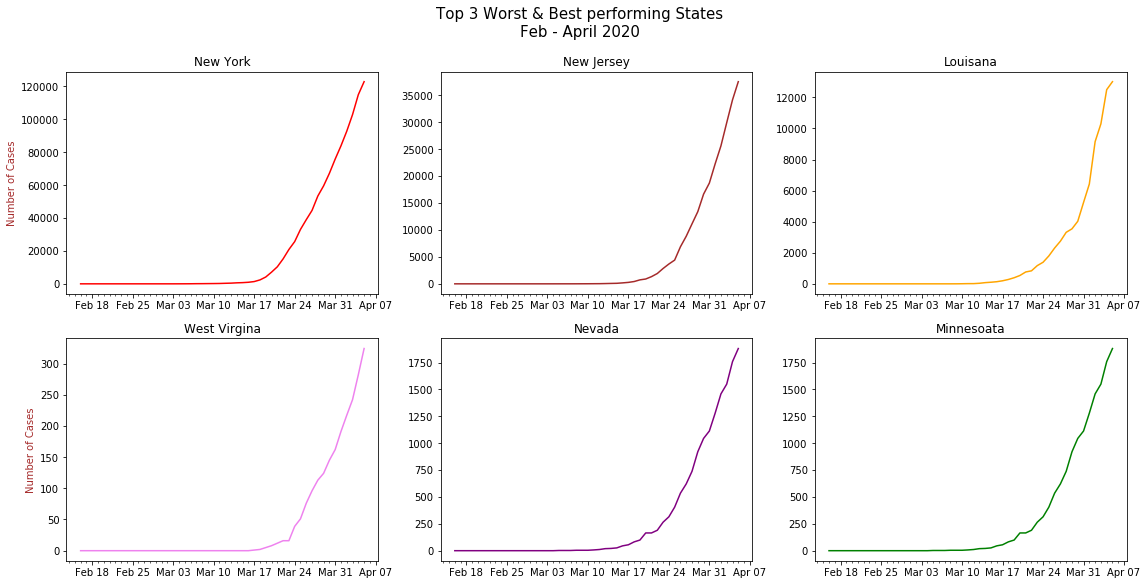

In [106]:
# Analyze the case count for 3 Worst and best performing states

state_df_ny = States_df_narrow.query("state == 'NY'")

state_df_nj = States_df_narrow.query("state == 'NJ'")

state_df_la = States_df_narrow.query("state == 'LA'")

state_df_wv = States_df_narrow.query("state == 'WV'")

state_df_nv = States_df_narrow.query("state == 'NV'")

state_df_mn = States_df_narrow.query("state == 'MN'")

fig = plt.figure(figsize=(19,9))

fig.suptitle('Top 3 Worst & Best performing States\nFeb - April 2020', fontsize=15)



# 1. New York

ax1 = fig.add_subplot(231)
ax1.set_title('New York')
ax1.set_ylabel("Number of Cases", color = "brown")

ax1.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

# Formatting

ax1.xaxis.set_minor_locator(mdates.DayLocator())

ax1.xaxis.set_major_locator(mdates.WeekdayLocator())

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 2. New Jersey

ax2 = fig.add_subplot(232)
ax2.set_title('New Jersey')

ax2.plot(state_df_nj['date'], state_df_nj['cases'], color = 'brown')

# Formatting

ax2.xaxis.set_minor_locator(mdates.DayLocator())

ax2.xaxis.set_major_locator(mdates.WeekdayLocator())

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 3. Louisana

ax3 = fig.add_subplot(233)
ax3.set_title('Louisana')

ax3.plot(state_df_la['date'], state_df_la['cases'], color = 'orange')

# Formatting

ax3.xaxis.set_minor_locator(mdates.DayLocator())

ax3.xaxis.set_major_locator(mdates.WeekdayLocator())

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 4. West Virgina

ax4 = fig.add_subplot(234)
ax4.set_title('West Virgina')
ax4.set_ylabel("Number of Cases", color = "brown")

ax4.plot(state_df_wv['date'], state_df_wv['cases'], color = 'violet')

# Formatting

ax4.xaxis.set_minor_locator(mdates.DayLocator())

ax4.xaxis.set_major_locator(mdates.WeekdayLocator())

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 5. Nevada

ax5 = fig.add_subplot(235)
ax5.set_title('Nevada')

ax5.plot(state_df_nv['date'], state_df_nv['cases'], color = 'purple')

# Formatting

ax5.xaxis.set_minor_locator(mdates.DayLocator())

ax5.xaxis.set_major_locator(mdates.WeekdayLocator())

ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# 6. Minnesota

ax6 = fig.add_subplot(236)
ax6.set_title('Minnesoata')

ax6.plot(state_df_nv['date'], state_df_nv['cases'], color = 'green')

# Formatting

ax6.xaxis.set_minor_locator(mdates.DayLocator())

ax6.xaxis.set_major_locator(mdates.WeekdayLocator())

ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

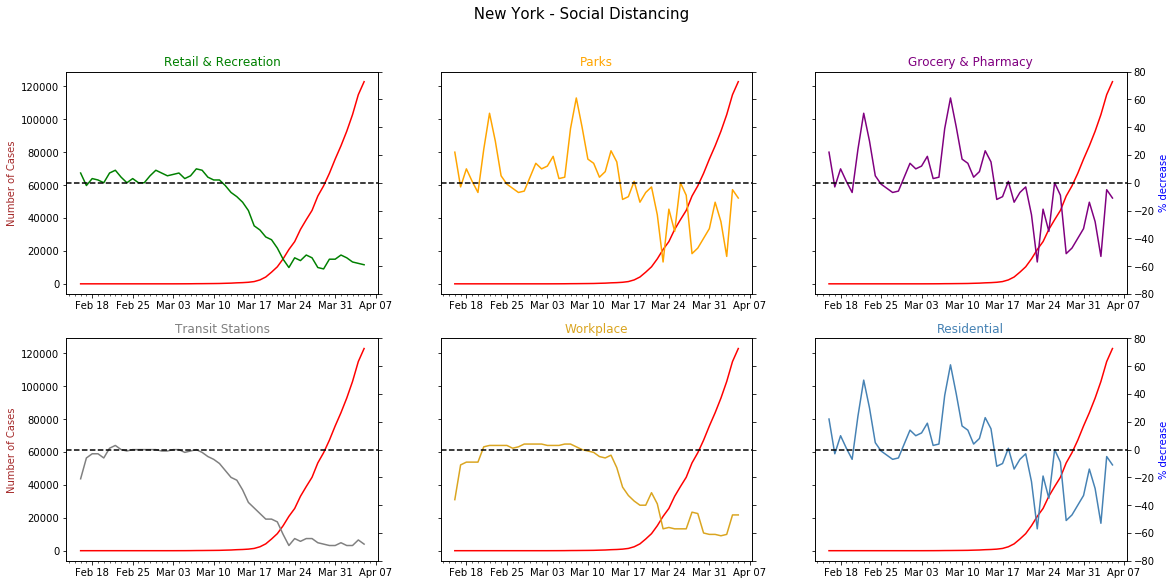

In [114]:
# Analyze the mobility of the most impacted State NY

fig = plt.figure(figsize=(19,9))

fig.suptitle(' New York - Social Distancing', fontsize=15)


# 1. New York Retail

ax1 = fig.add_subplot(231)

ax1.set_title('Retail & Recreation', color = 'green')

ax1.set_ylabel("Number of Cases", color = "brown")

ax1.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax1_2 = ax1.twinx()

ax1_2.plot(state_df_ny.date, state_df_ny.Per_decrease_ret_rec, color = 'green')

#ax1_2.set_ylabel("% decrease in traffic retail & recreation", color = "blue")

ax1_2.set_yticklabels([])

ax1_2.set_ylim(-80,80)

# Reference Line

ax1_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax1.xaxis.set_minor_locator(mdates.DayLocator())

ax1.xaxis.set_major_locator(mdates.WeekdayLocator())

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 2. New York parks

ax2 = fig.add_subplot(232)

ax2.set_title('Parks', color = 'orange')

#ax2.set_ylabel("Number of Cases", color = "brown")

ax2.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax2.set_yticklabels([])

ax2_2 = ax2.twinx()

ax2_2.plot(state_df_ny.date, state_df_ny.Per_decrease_parks, color = 'orange')

ax2_2.set_yticklabels([])

#ax2_2.set_ylabel("% decrease in parks", color = "blue")

ax2_2.set_ylim(-80,80)

# Reference Line

ax2_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax2.xaxis.set_minor_locator(mdates.DayLocator())

ax2.xaxis.set_major_locator(mdates.WeekdayLocator())

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 3. New York grocery

ax3 = fig.add_subplot(233)

ax3.set_title('Grocery & Pharmacy', color = 'purple')

#ax2.set_ylabel("Number of Cases", color = "brown")

ax3.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax3.set_yticklabels([])

ax3_2 = ax3.twinx()

ax3_2.plot(state_df_ny.date, state_df_ny.Per_decrease_parks, color = 'purple')

ax3_2.set_ylabel("% decrease", color = "blue")

ax3_2.set_ylim(-80,80)

# Reference Line

ax3_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax3.xaxis.set_minor_locator(mdates.DayLocator())

ax3.xaxis.set_major_locator(mdates.WeekdayLocator())

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 4. New York transit

ax4 = fig.add_subplot(234)

ax4.set_title('Transit Stations', color = 'grey')

ax4.set_ylabel("Number of Cases", color = "brown")

ax4.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax4_2 = ax4.twinx()

ax4_2.plot(state_df_ny.date, state_df_ny.Per_decrease_transit, color = 'grey')

#ax1_2.set_ylabel("% decrease in traffic retail & recreation", color = "blue")

ax4_2.set_yticklabels([])

ax4_2.set_ylim(-80,80)

# Reference Line

ax4_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax4.xaxis.set_minor_locator(mdates.DayLocator())

ax4.xaxis.set_major_locator(mdates.WeekdayLocator())

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# 5. New York workplace

ax5 = fig.add_subplot(235)

ax5.set_title('Workplace', color = 'goldenrod')

#ax2.set_ylabel("Number of Cases", color = "brown")

ax5.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax5.set_yticklabels([])

ax5_2 = ax5.twinx()

ax5_2.plot(state_df_ny.date, state_df_ny.Per_decrease_workplace, color = 'goldenrod')

ax5_2.set_yticklabels([])

#ax2_2.set_ylabel("% decrease in parks", color = "blue")

ax5_2.set_ylim(-80,80)

# Reference Line

ax5_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax5.xaxis.set_minor_locator(mdates.DayLocator())

ax5.xaxis.set_major_locator(mdates.WeekdayLocator())

ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# 6. New York residential

ax6 = fig.add_subplot(236)

ax6.set_title('Residential', color = 'steelblue')

#ax2.set_ylabel("Number of Cases", color = "brown")

ax6.plot(state_df_ny['date'], state_df_ny['cases'], color = 'red')

ax6.set_yticklabels([])

ax6_2 = ax6.twinx()

ax6_2.plot(state_df_ny.date, state_df_ny.Per_decrease_parks, color = 'steelblue')

ax6_2.set_ylabel("% decrease", color = "blue")

ax6_2.set_ylim(-80,80)

# Reference Line

ax6_2.axhline(y=0, color = 'black', linestyle = '--')

# Formatting

ax6.xaxis.set_minor_locator(mdates.DayLocator())

ax6.xaxis.set_major_locator(mdates.WeekdayLocator())

ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


plt.show()